<a href="https://colab.research.google.com/github/hijuliosantos/pos-AprendizadoNaoSupervisionado/blob/main/PCA%20ORL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas necessárias para executar o projeto

In [1]:
from google.colab import files
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import zipfile
import cv2
import glob

Adicionar o arquivo "ORL.zip" disponível no projeto

In [ ]:
file = files.upload()

Saving ORL.zip to ORL.zip


Extração dos arquivos zipados e mudança para o diretório aonde os arquivos foram extraídos: '/content/ORL2'


In [ ]:
zip_ref = zipfile.ZipFile(next(iter(file)), 'r')
zip_ref.extractall('')
zip_ref.close()

%cd '/content/ORL2'

/content/ORL2


In [2]:
%cd '/content/ORL2'

/content/ORL2


Leitura e preparação das imagens para utilização na PCA

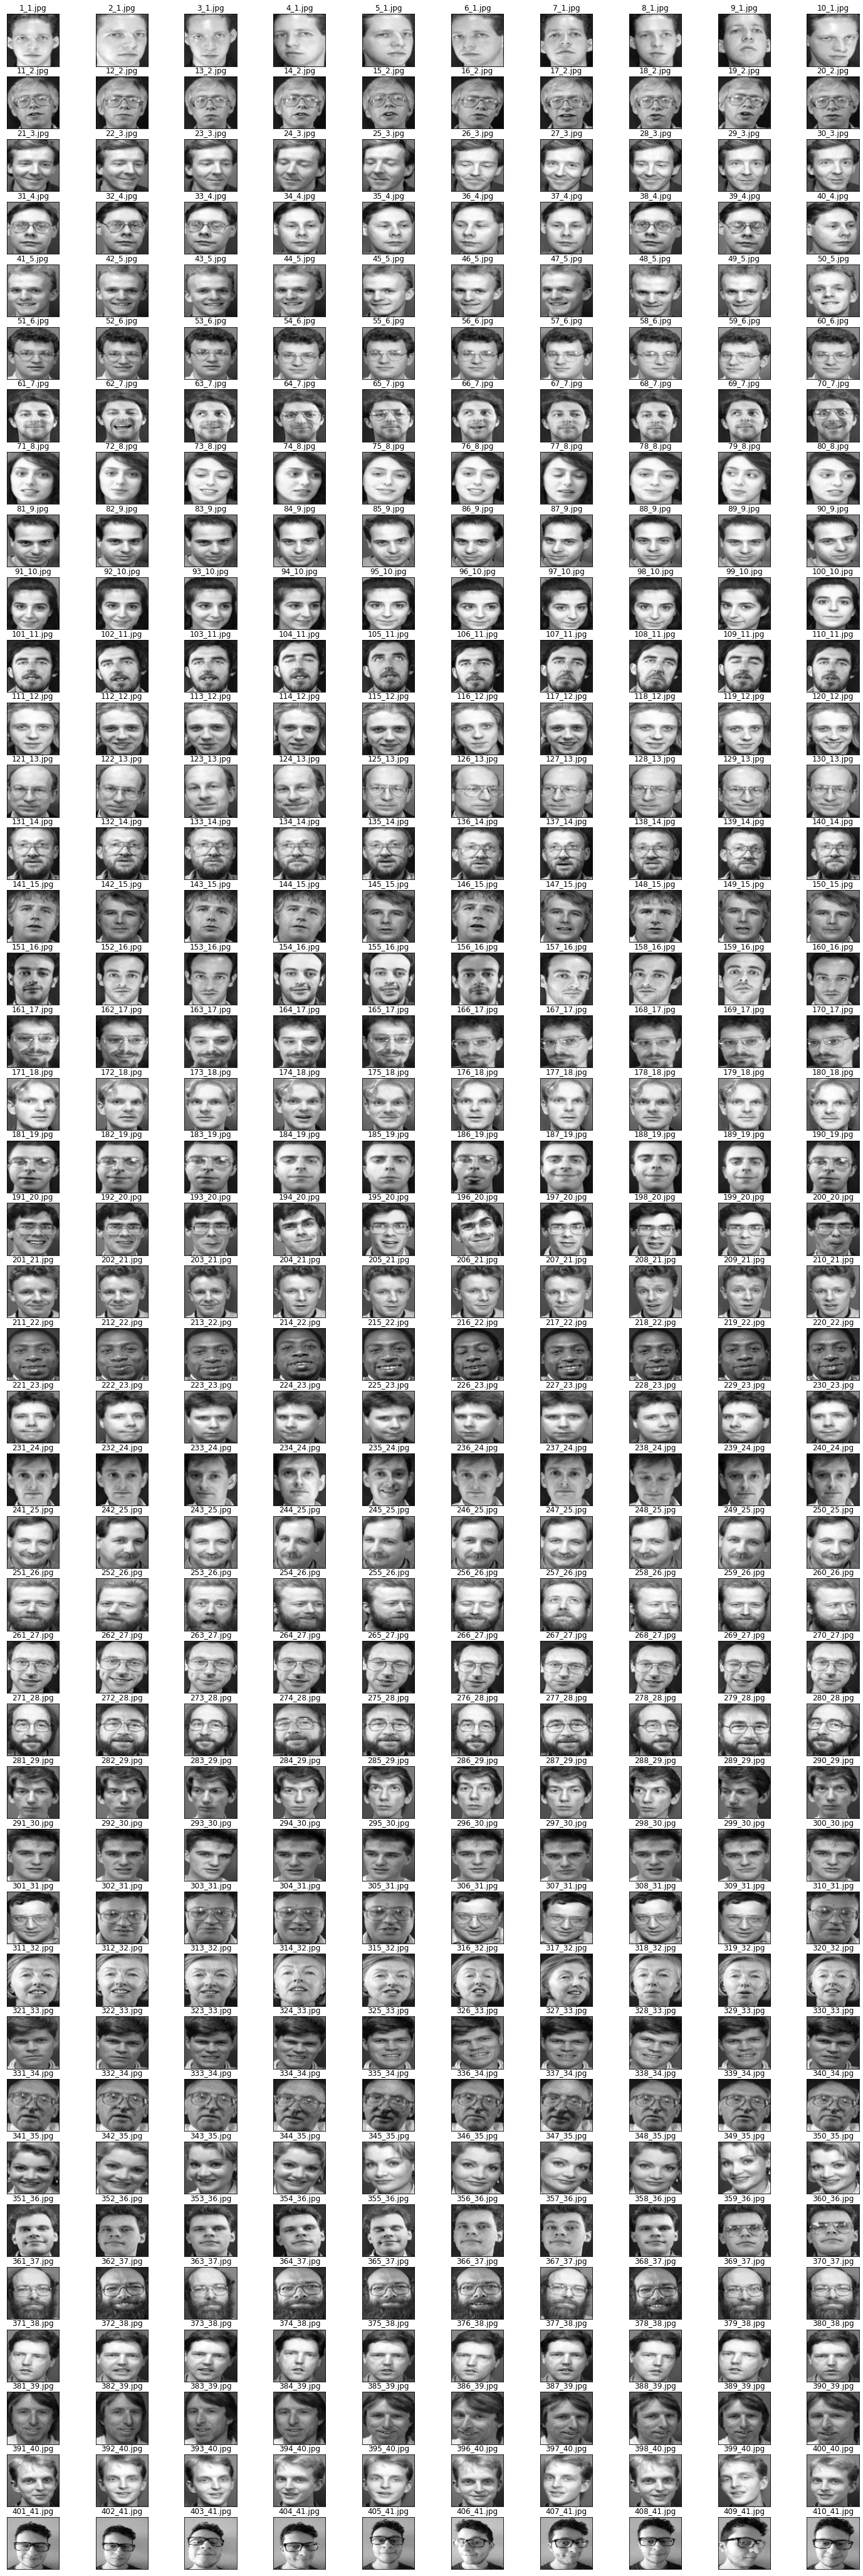

In [3]:
def sorter(item: str) -> int:
    return int(item[0:item.index('_')])

data = []
target = dict()

path = "*.*"
plt.figure(figsize=(25,75))
for i,file in enumerate(sorted(glob.glob(path), key= sorter)):
   img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
   img = cv2.resize(img, (80,80))
   data.append(img)
   split = file.split('_')
   target[split[0]] = split[1][0:-4]

   plt.subplot(41,10,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.title(file)
   plt.imshow(img,cmap="gray")

plt.show()

# Prepara os dados para utilizar no sklearn
data = np.asarray(data)
data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
target = np.array(list(target.items()))

Aplico um holdout 70% treino / 30% teste e utilizo estes dados em um loop de PCA com o número de componentes de 10 até 20. A variável independete (X) são os dados das imagens (numpy array) e a variavel dependete (Y) é o ID da imagem.
Utilizo o algoritmo de aprendizado supervisionado 'Máquina de vetores de suporte' para realizar a predição e calcular a acurácia para cada iteração.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42, shuffle=True)

n = 10
end = 20

while n <= end:
  pca = PCA(n_components=n, whiten=True)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)
  clf = SVC(class_weight='balanced')
  clf.fit(x_train_pca, y_train[:,1])

  y_pred_test = clf.predict(x_test_pca)

  
  print('{0} componentes principais, acurácia: {1}%'.format(n, round(accuracy_score(y_test[:,1], y_pred_test) * 100, 4)))
  n += 1

10 componentes principais, acurácia: 90.2439%
11 componentes principais, acurácia: 90.2439%
12 componentes principais, acurácia: 88.6179%
13 componentes principais, acurácia: 87.8049%
14 componentes principais, acurácia: 91.8699%
15 componentes principais, acurácia: 91.0569%
16 componentes principais, acurácia: 89.4309%
17 componentes principais, acurácia: 88.6179%
18 componentes principais, acurácia: 88.6179%
19 componentes principais, acurácia: 91.0569%
20 componentes principais, acurácia: 93.4959%


Apresendo a imagem utilizada para o teste, a transformação da PCA (20 componentes) e a correspondete predita. Quando a predição der errado, será exibida uma imagem em branco.

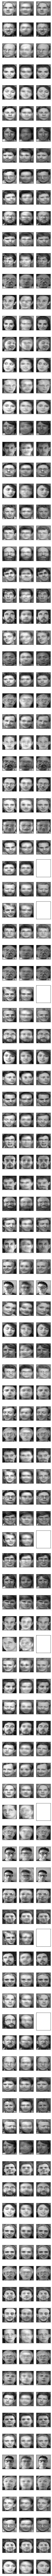

In [10]:
index = 0
final_index = y_pred_test.shape[0]
plt_pos = 1

fig = plt.figure(figsize=(4,final_index + 100))
while index < final_index:
  a = fig.add_subplot(final_index +1,3,plt_pos)
  a.imshow(x_test[index].reshape(80,80), cmap="gray")
  a.xaxis.set_visible(False)
  a.yaxis.set_visible(False)
  plt_pos += 1

  c = fig.add_subplot(final_index +1,3,plt_pos)
  c.imshow(pca.inverse_transform(x_test_pca[index]).reshape(80,80), cmap="gray")
  c.xaxis.set_visible(False)
  c.yaxis.set_visible(False)
  plt_pos += 1

  b = fig.add_subplot(final_index +1,3,plt_pos)
  try:
    b.xaxis.set_visible(False)
    b.yaxis.set_visible(False)
    im = cv2.imread(y_test[index,0] + '_' + y_pred_test[index] + '.jpg')
    im = cv2.resize(im, (80,80))
    b.imshow(im, cmap="gray")
  except:
    pass

  plt_pos += 1
  index = index + 1
plt.show()